# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/11/25, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 asks you to write code to implement several simple
    functions using more general programming and some which are unique
    to Julia (which might mean that you need to look at the
    documentation or use Julia’s help function, which is accessed with
    `?`, e.g. `?sum` for help with the `sum()` function) or to analyze
    Julia syntax.
-   Problem 3 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\Lyy\lab1-132140636yyy\hw01`
   Installed OffsetArrays ──────────── v1.17.0
   Installed EarCut_jll ────────────── v2.2.4+0
   Installed PDMats ────────────────── v0.11.35
   Installed HypergeometricFunctions ─ v0.3.28
   Installed StatsFuns ─────────────── v1.5.0
   Installed NetworkLayout ─────────── v0.4.10
   Installed Unitful ───────────────── v1.23.1
   Installed StaticArrays ──────────── v1.9.14
   Installed Rmath_jll ─────────────── v0.5.1+0
   Installed StaticArraysCore ──────── v1.4.3
   Installed ArnoldiMethod ─────────── v0.4.0
   Installed SpecialFunctions ──────── v2.5.1
   Installed Ratios ────────────────── v0.4.5
   Installed GraphRecipes ──────────── v0.5.14
   Installed GeometryTypes ─────────── v0.8.5
   Installed ColorTypes ────────────── v0.11.5
   Installed Inflate ───────────────── v0.1.5
   Installed Extents ───────────────── v0.1.6
   Installed ColorVectorSpace ──────── v0.10.0
   Installed AbstractTrees ─────────── v0.4.5
   I

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings
using Distributions

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 30 Points)

### Problem 1 (12 points)

The following subproblems all involve code snippets that require
debugging. You are encouraged to use online resources (*e.g.* Julia
documentation and forums, Stack Overflow, Reddit, etc) to help find
diagnose error messages and find solutions, but make sure that you
clearly document which resources you used and how you used them.

#### Problem 1.1
You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

#### Answer 1.1 
When I first tested this code, it returned 0 as the minimum value, even though 0 does not exist in the provided array. The actual minimum should be 78. I suspect the error occurs because **the initial min_value was too small and it was set to 0**, so no element in the array is smaller than this starting value.

To fix the problem, we need to initialize min_value **with a sufficiently large number**. I **changed it from 0 to 10,000,000**, and now the minimum() function correctly returns 78.

In [ ]:
function minimum(array)
    # initialize the minimum value counter
    min_value = 10000000
    # update minimum values
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    # return found minimum
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an `UndefVarError`.

#### Answer 1.2
The meaning of `UndefVarError` is it **cannot find the correspongding function after @show**. Since the function name class_average() is missing, this code cannot successfully be run. Also we should put the array student_grades within (), instead of average_grade. Average_grade is just a defined variable within function class_average.

So the correct code should be **@show class_average(student_grades);**.

In [8]:
# enter student grade vector
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
# compute class average
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3
Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces a `MethodError`.

#### Answer 1.3
The MethodError occurs because **zero(n_trials) was used incorrectly**. What we actually need is **an array of length 1000 to store the generated random values**. However, zero(n_trials) only returns the integer 0, not an array. Since an integer cannot hold 1000 values, the code fails when attempting to index into it.

In [16]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
# set number of trials and initialize outcome vector
n_trials = 1_000
outcomes = zeros(Int,n_trials)
# simulate number of passadieci rolls and count wins
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.391


#### Problem 1.4

You’re interested in writing some code to remove the mean of a vector
from all of its components. You’ve written the following code and tried
to test it on a random vector, but your code returns a `MethodError`.

#### Answer 1.4
The MethodError occurs because **vect is a vector and m is a scalar**, so they cannot be subtracted directly. If we want to subtract m from each element of vect, **we need to use the elementwise operator .- instead of -**.

In [24]:
# function to remove mean from a vector
function remove_mean(vect)
    # fucntion to compute the mean
    function compute_mean(vect)
        element_sum = 0 # initialize sum
        # compute mean and return
        for v in vect
            element_sum += v
        end
        return element_sum / length(vect)
    end

    m = compute_mean(vect) # compute mean
    # return demeaned vector
    return vect .- m
end

random_vect = rand(1_000)
@show remove_mean(random_vect)

remove_mean(random_vect) = [0.037127131801273694, -0.3579116316050869, 0.4558194989445373, -0.36069975121248155, 0.25279440864812697, -0.4874824481803701, 0.4875370394219454, 0.4406193193986143, -0.3894187894165013, 0.3902347729979515, 0.24510466748580828, 0.2410973132164358, 0.015587271219666077, 0.4580604553903488, 0.4611588650745191, 0.40105021657053064, 0.017313652795339918, -0.3398158559065353, -0.11145830646778099, -0.27640209024812434, 0.44810456250654507, 0.4284427123205996, -0.10266484446402135, 0.019143750753844224, 0.34793613943742574, -0.26765074532067823, 0.415937762657283, 0.10738675395636166, 0.43579684405197416, -0.493669538520353, 0.3176573709816213, -0.02769873805946932, -0.04215974468023176, 0.34954080045577884, -0.025164733232810432, -0.334331540728945, 0.09976192037701304, -0.34089947997336045, 0.08388849242975949, 0.07036294081554162, 0.23852257818280453, -0.3809340422850135, 0.1818960553897897, -0.03401682705386322, -0.33907546701780444, 0.2779696930982487, -0.40

1000-element Vector{Float64}:
  0.037127131801273694
 -0.3579116316050869
  0.4558194989445373
 -0.36069975121248155
  0.25279440864812697
 -0.4874824481803701
  0.4875370394219454
  0.4406193193986143
 -0.3894187894165013
  0.3902347729979515
  ⋮
 -0.10550985804372948
  0.41163371031226526
 -0.3404151695685027
 -0.33149769925784933
  0.41728804423133803
  0.16953181707857512
  0.35258515351744124
  0.2532752651535173
 -0.218948728134418

### Problem 2 (18 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal,
chemical treatment, and direct disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

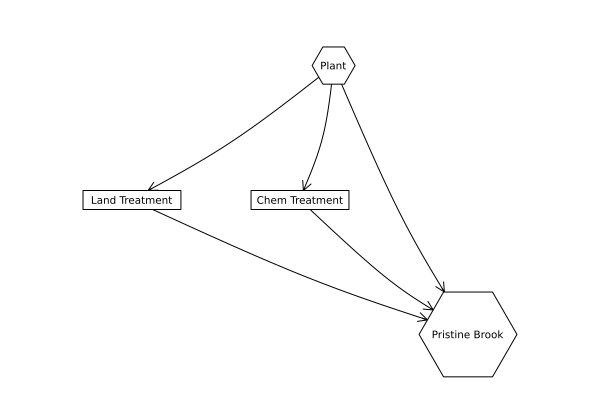

In [29]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => "", (1,3) => "", (1, 4) => "",(2, 4) => "",(3, 4) => "")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

#### Problem 2.1

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

#### Answer 2.1
Designed of varaibles <br>
$X_1$ = flow to land disposal $(m^3/day)$ <br>
$X_2$ = flow to chemical treatment $(m^3/day)$ <br>
$X_3$ = flow discharged directly to Pristine Brook $(m^3/day)$ <br><br>
**Treatment Cost**<br>
Land disposal cost: $C_1(X_1) = \frac{X_1^2}{20}$ <br>
Chemical treatment cost:  $C_2(X_2) = 1.5X_2 $ <br>
Total daily cost: $C(X_1,X_2,X_3) = \frac{X_1^2}{20} + 1.5X_2$ <br><br>
**The amount of YUK that will be discharged into Pristine Brook**<br>
Total plant outflow per day: $X_1+X_2+X_3=100$ <br>
Mass from land disposal: $D_1(X_1) = 0.2X_1$ <br>
Mass from chemical treatment: $D_2(X_2) = 0.005X_2^2$ <br>
Total YUK discharged into Pristine Brook: $Total = 0.2X_1 + 0.005X_2^2 + X_3$ <br>
Constraint: $0.2X_1 + 0.005X_2^2 + X_3 <= 20$ <br>


#### Problem 2.2

Implement your systems model as a Julia function which computes the
resulting YUK discharge and cost for a particular treatment plan. You
can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [38]:
function yuk(x1, x2)
    x3 = 100-x1-x2
    return (x1^2/20+1.5*x2, 0.2*x1+0.005*x2^2+x3)
end

cost, discharge = yuk(80, 19)
@show cost;
@show discharge;

cost = 348.5
discharge = 18.805


To evalute the function over vectors of inputs, you can *broadcast* the
function by adding a decimal `.` before the function arguments and
accessing the resulting values by writing a *comprehension* to loop over
the individual outputs in the vector:

In [40]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

output = yuk.(x, y)
a = [out[1] for out in output]
b = [out[2] for out in output]
@show a;
@show b;

a = [9.05, 10.7, 12.45, 14.3, 16.25]
b = [93.38, 91.645, 89.92, 88.205, 86.5]


#### Answer 2.2
By setting values for $x_1$ and $x_2$, and using $x_3 = 100 - x_1 - x_2$, we can calculate the cost and discharge with the mathematical model. <br>
When applying the model to **multiple pairs of $x_1$ and $x_2$**, we need to use broadcasting (add a . before the function) so that it is applied element-wise.

#### Problem 2.3
Use your function to experiment with 1,000 different combinations of
wastewater discharge and treatment. You can do this with either a grid
search or by sampling from a [Dirichlet
distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) (a
$\text{Dirichlet}(1, n)$ distribution will generate uniformly-weighted
$n$-dimensional vectors whose components add up to 1; see the
[`Distributions.jl`
documentation](https://juliastats.org/Distributions.jl/stable/starting/)
for how to sample from probability distributions in Julia). Plot the
results of these experiments. Do any satisfy the YUK effluent standard
(plot this as well as a dashed red line). What was the cost of solutions
satisfying the standard? What can you say about the tradeoff between
treatment cost and YUK discharge? You don’t have to find an “optimal”
solution to this problem, but what do you think would be needed to find
a better solution?

#### Answer 2.3
1. To test the mathematical model of the YUK treatment process with 1,000 random inputs, we **first generate 1,000 triplets $(x_1, x_2, x_3)$ subject to the constraint $x_1 + x_2 + x_3 = 100$**. Using the **Dirichlet distribution together with the rand function**, we can sample 1,000 random allocations that satisfy this condition. <br>
2. Then we put the 1000 random allocations into function $yuk(x_1,x_2)$ that we developed in Problem 2.2. The **results with 1000 paired input** are shown in the figure below. <br>
3. Results that satisfy with the YUK effluent standard: <br>
The values **located to the left of the red line** represent allocations that satisfy the YUK effluent standard. Most of these solutions have **costs greater than 260 $/day**. The figure clearly shows that **higher costs are associated with lower YUK discharges**. To identify a better solution, we would need to generate more feasible allocations that meet the effluent standard and then determine the minimum possible cost among them.


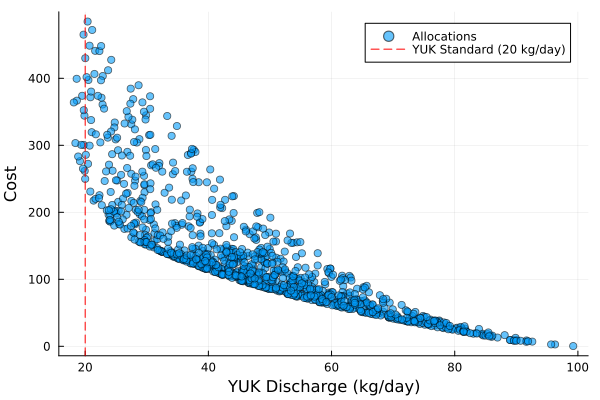

In [48]:
# generate 1000 random values
n = 1000
d = Dirichlet(3, 1.0)  # make x1, x2, x3 sum to 1
allocations = rand(d, n)  # generate 1000 paired random values
allocations .*= 100   # make x1, x2, x3 sum to 100

# calculation of cost and discharge
results = [yuk(a[1], a[2]) for a in eachcol(allocations)]
cost   = map(first, results)  # first output from function yuk(x1,x2) is cost
discharge = map(last, results) # second output from function yuk(x1,x2) is discharge

# plot results
scatter(discharge, cost, label="Allocations", xlabel="YUK Discharge (kg/day)", ylabel="Cost", alpha=0.6)
vline!([20], linestyle=:dash, color=:red, label="YUK Standard (20 kg/day)")


#### Problem 2.4
Find the strategies which minimize cost and YUK discharge (these will be
different strategies) analytically and find the values of the objective
metrics. Plot these values in the plot that you created for Problem 2.3.
How do their values compare to the spread of values that you found in
that problem? Would you select either of them (explain why or why not)?

#### Answer 2.4
1. Cost minimize function <br>
We aimed to identify the allocation that minimizes cost while meeting the YUK effluent standard of 20 kg/day. Using findall, we filtered allocations $(x_1, x_2, x_3)$ satisfying $discharge ≤ 20$. We then applied argmin to find the allocation with the lowest cost. <br>
The results show that the minimal cost is 261.8 $/day, corresponding to a discharge of 19.92 kg/day for the allocation: $x_1 = 64.97 kg/day, x_2 = 33.83 kg/day, x_3 = 1.2 kg/day$ <br>
2. Discharge minimize function <br>
To minimize discharge, we can set up $x3=0$, then $x2 = 100-x3$, <br>
cost function will be $cost = 100-0.8x_1-x_2+0.005x_2^2$,<br>
Whem $x_1=80$, $x_2=20$, $x_3=0$, the discharge reaches its minimum value of $18 kg/day$. <br>
The corresponding treatment cost is 350$/day. <br>
3. I will adopt the **minimal cost strategy**. In the figure below, the red star represents the minimal cost allocation, while the orange marker indicates the minimal discharge allocation. It is evident that reducing the discharge below 20 kg/day **requires a disproportionately high cost for only a small additional decrease in YUK discharge**. Considering **both treatment cost and discharge**, the minimal cost strategy provides the most balanced and efficient solution.


x1, x2, x3: [64.97022592838785, 33.82635967849744, 1.2034143931147145]
Minimal cost: 261.7960523770342cor discharge: 19.91857262428767


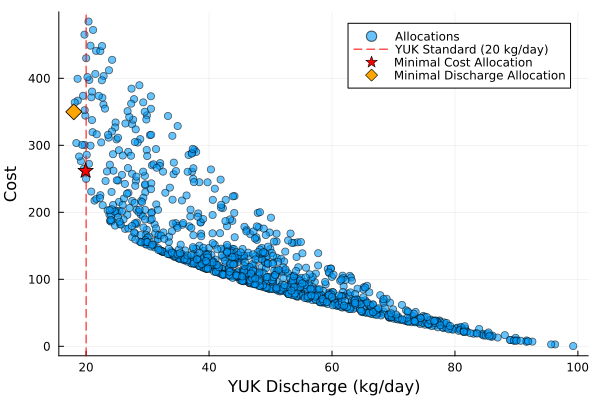

In [60]:
# cost minimize function
valid_indices = findall(d -> d <= 20, discharge)
valid_allocs = allocations[:, valid_indices]
valid_costs = cost[valid_indices]
valid_dis   = discharge[valid_indices]

# find minimal cost allocation
min_index = argmin(valid_costs)
min_alloc = valid_allocs[:, min_index]
cor_dis  = valid_dis[min_index]
min_cost = valid_costs[min_index]

println("x1, x2, x3: ", min_alloc)
println("Minimal cost: ", min_cost, "cor discharge: ",cor_dis)

# existing scatter of all allocations
scatter(discharge, cost, label="Allocations", xlabel="YUK Discharge (kg/day)", ylabel="Cost", alpha=0.6)
vline!([20], linestyle=:dash, color=:red, label="YUK Standard (20 kg/day)")

# add minimal cost allocation
scatter!([19.92], [261.8], color=:red, marker=:star5, label="Minimal Cost Allocation", markersize=8)

# add minimal discharge allocation
scatter!([18], [350], color=:orange, marker=:diamond, label="Minimal Discharge Allocation", markersize=8)



## References
Google